In [1]:
import matplotlib.pyplot as plt
import numpy as np
from eventio import SimTelFile
import pickle as pkl
import pandas as pd
#

In [2]:
def print_ev_info(header, pe_inf, wf_arr):
    #cout<<"jentry   "<<jentry<<endl;
    #cout<<"event_id "<<event_id<<endl
    #    <<"energy   "<<energy<<endl
    #    <<"xcore    "<<xcore<<endl
    #    <<"ycore    "<<ycore<<endl
    #    <<"ev_time  "<<ev_time<<endl
    #    <<"nphotons "<<nphotons<<endl
    #    <<"n_pe     "<<n_pe<<endl
    #    <<"n_pixels "<<n_pixels<<endl;
    #for i in range(0,len(header)):
    print(header.shape)
    print(pe_inf.shape)
    #
    for i in range(0,10):
        print("-----------------")
        print("jentry     ",i)
        print("event_id   ",header[i,0])
        print("energy     ",header[i,1])
        print("xcore      ",header[i,2])
        print("ycore      ",header[i,3])
        print("ev_time    ",header[i,4])
        print("nphotons   ",header[i,5])
        print("n_pe       ",header[i,6])
        print("n_pixels   ",header[i,7])
        #
        nn=header[i,6]
        if nn > 10 :
            nn=10
        #
        for j in range(0,nn):
            print(pe_inf[j,1])
        for j in range(0,nn):
            print(pe_inf[j,2])
        for j in range(0,nn):
            print(wf_arr[0][0,j,0])
            
    #    "xcore    "xcore<<endl
    #    "ycore    "ycore<<endl
    #    "ev_time  "ev_time<<endl
    #    "nphotons "nphotons<<endl
    #    "n_pe     "n_pe<<endl
    #    "n_pixels "n_pixels
        

In [3]:
#header = pkl.load(open('../compressed_data/gamma/corsika_run307.header.pkl', 'rb'))
#pe_inf = pkl.load(open('../compressed_data/gamma/corsika_run307.pe_info.pkl', 'rb'))
#wf_inf = pkl.load(open('../compressed_data/gamma/corsika_run307.wf_info_00000.pkl', 'rb'))
header = pkl.load(open('../compressed_data/no_nsb_cut/gamma/corsika_run307.header.pkl', 'rb'))
pe_inf = pkl.load(open('../compressed_data/no_nsb_cut/gamma/corsika_run307.pe_info.pkl', 'rb'))
wf_inf = pkl.load(open('../compressed_data/no_nsb_cut/gamma/corsika_run307.wf_info_00000.pkl', 'rb'))
wf_pkl_list=!ls ../compressed_data/no_nsb_cut/gamma/corsika_run307.wf_info*.pkl
#
fadc_sum_offset=15
fadc_amplitude=8.25
fadc_MHz=1024
fadc_sample_in_ns=1000.0/fadc_MHz
time_offset=fadc_sum_offset*fadc_sample_in_ns
fadc_bins=75
#
print('fadc_sum_offset   = ', fadc_sum_offset)
print('fadc_amplitude    = ', fadc_amplitude)
print('fadc_MHz          = ', fadc_MHz)
print('fadc_sample_in_ns = ', fadc_sample_in_ns)
print('fadc_bins         = ', fadc_bins)
print('time_offset       = ', time_offset)
#
wf_times=np.array(range(fadc_bins))*1000.0/1024.0

fadc_sum_offset   =  15
fadc_amplitude    =  8.25
fadc_MHz          =  1024
fadc_sample_in_ns =  0.9765625
fadc_bins         =  75
time_offset       =  14.6484375


In [4]:
# event_id
# energy
# xcore
# ycore
# ev_time
# nphotons
# n_pe
# n_pixels
#header
df_header = pd.DataFrame({'event_id': header[:,0], 
                          'energy': header[:,1],
                          'xcore': header[:,2],
                          'ycore': header[:,3],
                          'ev_time': header[:,4],
                          'nphotons': header[:,5],
                          'n_pe': header[:,6],
                          'n_pixels': header[:,7]})

In [5]:
df_pe_inf = pd.DataFrame({'event_id': pe_inf[:,0], 
                          'pixel_id': pe_inf[:,1],
                          'time': pe_inf[:,2]})

In [6]:
#df_header.to_csv('../compressed_data/no_nsb_cut/gamma/corsika_run307.header.csv',sep=' ',header=False)
#df_pe_inf.to_csv('../compressed_data/no_nsb_cut/gamma/corsika_run307.pe_info.csv',sep=' ',header=False)

In [4]:
wf_inf.shape

(7987000, 75)

In [7]:
wf_arr = [pkl.load(open(thefile, 'rb')) for thefile in wf_pkl_list]

In [8]:
print_ev_info(header, pe_inf, wf_arr)

(2857, 8)
(2626640, 3)
-----------------
jentry      0
event_id    200.0
energy      0.7915171980857849
xcore       66.2419204711914
ycore       -169.16844177246094
ev_time     -205.8639678955078
nphotons    13226.0
n_pe        4730.0
n_pixels    568.0
32.0
207.0
207.0
672.0
1407.0
1407.0
1408.0
1522.0
1783.0
2419.0
-182.24424743652344
-150.49803161621094
-150.49496459960938
-137.1856689453125
-171.41986083984375
-171.4193115234375
-171.44947814941406
-178.20062255859375
-178.30624389648438
-173.4148712158203
307
298
295
299
303
291
295
297
299
298
-----------------
jentry      1
event_id    201.0
energy      0.7915171980857849
xcore       44.880523681640625
ycore       -323.8881530761719
ev_time     -171.30230712890625
nphotons    4910.0
n_pe        1120.0
n_pixels    260.0
32.0
207.0
207.0
672.0
1407.0
1407.0
1408.0
1522.0
1783.0
2419.0
-182.24424743652344
-150.49803161621094
-150.49496459960938
-137.1856689453125
-171.41986083984375
-171.4193115234375
-171.44947814941406
-178.200622

In [9]:
(wf_arr[0].shape)

(7987, 75, 1000)

In [7]:
np.savetxt('data.csv', wf_inf, delimiter=' ',fmt='%i')

In [6]:
wf_inf

array([[307, 298, 295, ..., 299, 304, 295],
       [301, 299, 300, ..., 300, 297, 299],
       [302, 304, 308, ..., 300, 293, 301],
       ...,
       [301, 302, 297, ..., 301, 302, 295],
       [303, 302, 302, ..., 302, 299, 299],
       [303, 301, 293, ..., 304, 296, 299]], dtype=uint16)

In [10]:
#for i in range(len(wf_arr)):
#    wf_arr[i]=wf_arr[i].reshape((wf_arr[i].shape[0]*wf_arr[i].shape[2],wf_arr[i].shape[1]))

In [11]:
#wf_arr_tot=np.append(wf_arr[0],wf_arr[1],axis=0)
#wf_arr_tot=np.append(wf_arr_tot,wf_arr[2],axis=0)
print(wf_arr[0].shape)

(7987, 75, 1000)


In [12]:
#df_wf=pd.DataFrame(wf_arr_tot, columns=[str(j) for j in range(75)])

In [13]:
#df_wf.to_csv('../compressed_data/no_nsb_cut/gamma/corsika_run307.wf_info.csv',sep=' ',header=False)

In [14]:
#wf_arr = pkl.load(open(thefile, 'rb'))
    #print(thefile)
    #wf_arr = pkl.load(open(thefile, 'rb'))
    #print(wf_arr.shape)
    #df_wf=pd.DataFrame(wf_arr[:,:,0], columns=[str(j) for j in range(wf_arr.shape[1])])
    #for i_ev in range (1,wf_arr.shape[2]):
    #for i in range (wf_inf.shape[2]):
    #df=pd.DataFrame({'event_id': header[:,0], 
    #                     'energy': header[:,1],
    #                     'xcore': header[:,2],
    #                    'ycore': header[:,3],
    #                   'ev_time': header[:,4],
    #                  'nphotons': header[:,5],
    #                 'n_pe': header[:,6],
    #                'n_pixels': header[:,7]})
    #df=pd.DataFrame(wf_inf[:,:,0], columns=[str(j) for j in range(75)])

In [12]:
#df_header_cut=df_header[df_header.index<1000]

In [15]:
df_header[df_header['n_pe']>400000]

,event_id,energy,xcore,ycore,ev_time,nphotons,n_pe,n_pixels
2500,881406.0,21.42593,-30.53093,-111.184082,-100.075691,1073086.0,405309.0,4581.0


In [16]:
df_pe_inf[df_pe_inf['event_id']==881406.0]['pixel_id'].describe()

count    405309.000000
mean       3330.659938
std         710.964265
min           0.000000
25%        2773.000000
50%        3032.000000
75%        4048.000000
max        7976.000000
Name: pixel_id, dtype: float64

In [17]:
len(df_pe_inf[df_pe_inf['event_id']==881406.0])

405309

<Axes: >

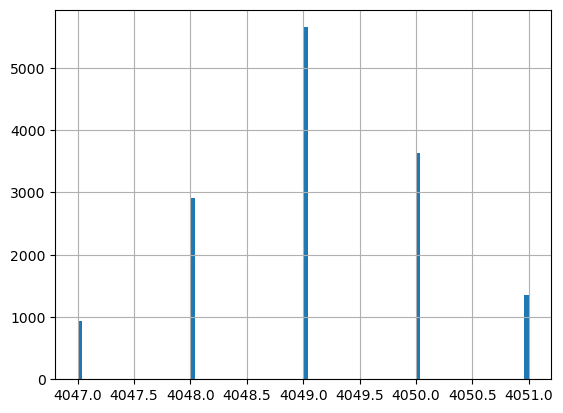

In [18]:
df_pe_inf[df_pe_inf['event_id']==881406.0]['pixel_id'].hist(bins=100,range=(4047,4051))

In [19]:
np.sum(df_pe_inf[df_pe_inf['event_id']==881406.0]['pixel_id']==4047)

934

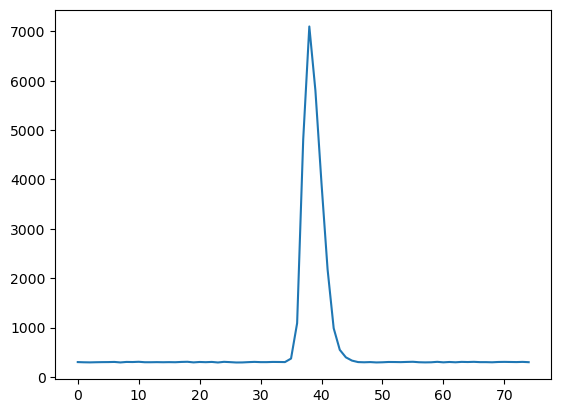

In [20]:
plt.plot(wf_arr[2][4047,:,500])

In [26]:
np.savetxt('dat_000.csv',wf_arr[0],delimiter=' ')

ValueError: Expected 1D or 2D array, got 3D array instead

<Axes: >

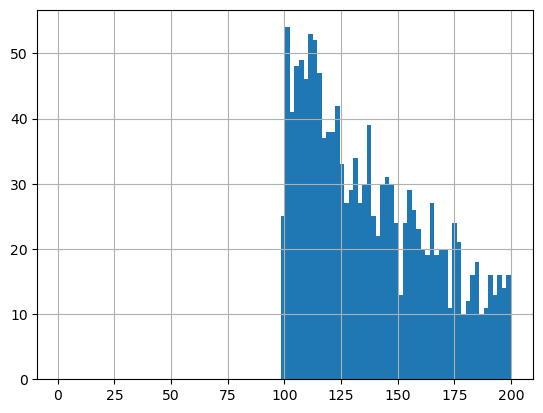

In [25]:
df_header['n_pe'].hist(bins=100,range=(1,200))

In [19]:
np.max(wf_arr[2][4047,:,500])

7098

In [20]:
np.min(wf_arr[2][4047,:,500])

292

In [21]:
(7098.0-292)/934.0

7.28693790149893

In [22]:
[i for i in range(0,1000)][0]

0

In [2]:
arr_test_01=np.array([np.zeros((3,3))+0,np.zeros((3,3))+1,np.zeros((3,3))+2])
arr_test_02=np.array([np.zeros((3,3))+3,np.zeros((3,3))+4,np.zeros((3,3))+5])
arr_test_03=np.array([np.zeros((3,3))+6,np.zeros((3,3))+7,np.zeros((3,3))+8])

In [13]:
A=np.array(np.zeros((3,3)))
A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
B=np.array(np.zeros((3,1))+1.0)
B

array([[1.],
       [1.],
       [1.]])

In [16]:
C=np.append(B,A,axis=1)
C

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
arr_test=np.append(arr_test_01,arr_test_02,axis=0)

In [3]:
arr_test=np.append(arr_test_01,arr_test_02,axis=0)

In [4]:
arr_test=np.append(arr_test,arr_test_03,axis=0)

In [6]:
arr_test

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]],

       [[7., 7., 7.],
        [7., 7., 7.],
        [7., 7., 7.]],

       [[8., 8., 8.],
        [8., 8., 8.],
        [8., 8., 8.]]])

In [79]:
arr_test_01.shape

(3, 3, 3)

In [72]:
arr_test.reshape((9,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

In [73]:
np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
wf_pkl_list[2]

'../compressed_data/no_nsb_cut/gamma/corsika_run307.wf_info_00002.pkl'

<Axes: >

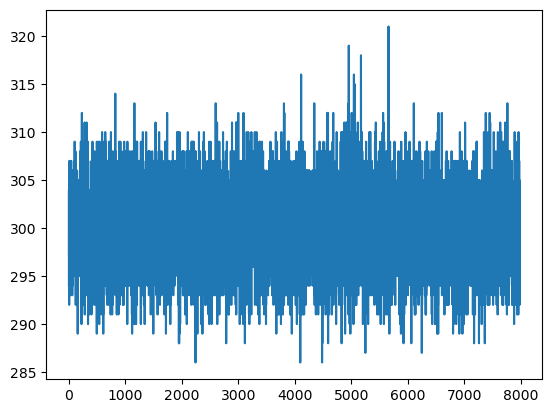

In [44]:
df['49'].plot()

In [6]:
df_header_short=df_header[0:1000]

<Axes: >

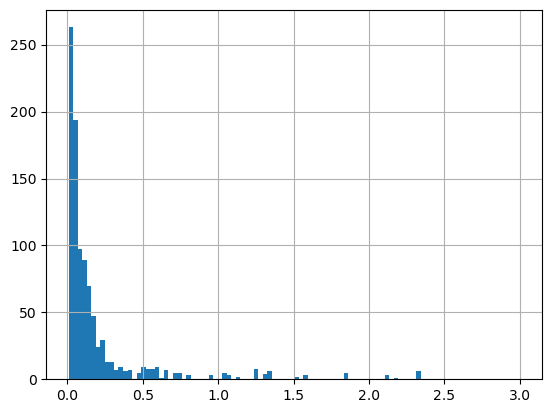

In [7]:
df_header_short['energy'].hist(bins=100,range=(0.01,3))

In [8]:
df_header_short[(df_header_short['energy']>1.0)]

,event_id,energy,xcore,ycore,ev_time,nphotons,n_pe,n_pixels
8,4101.0,2.319168,-310.827850,-420.966187,247.481247,6213.0,452.0,138.0
9,4102.0,2.319168,-26.319592,8.353882,-103.984787,56563.0,22071.0,1470.0
10,4103.0,2.319168,-339.933075,221.349945,275.495026,7822.0,840.0,205.0
11,4104.0,2.319168,134.183365,-307.201874,-271.457367,11830.0,2772.0,426.0
12,4107.0,2.319168,417.029205,-134.415924,-583.476624,5321.0,220.0,108.0
13,4109.0,2.319168,242.590134,-316.148468,-389.808044,7546.0,845.0,228.0
61,20801.0,1.845631,-259.768555,-57.288132,168.559113,20107.0,6865.0,747.0
62,20805.0,1.845631,230.542770,281.410248,-371.334351,5326.0,244.0,107.0
63,20806.0,1.845631,98.375465,232.417664,-228.602280,9427.0,1925.0,334.0
64,20807.0,1.845631,256.929321,102.209694,-408.870819,8445.0,1006.0,221.0


In [9]:
ev_ID=9

In [10]:
df_header_short.iloc[ev_ID]

event_id     4102.000000
energy          2.319168
xcore         -26.319592
ycore           8.353882
ev_time      -103.984787
nphotons    56563.000000
n_pe        22071.000000
n_pixels     1470.000000
Name: 9, dtype: float64

In [11]:
ev_sim_id=int(df_header_short.iloc[ev_ID]['event_id'])
ev_sim_id

4102

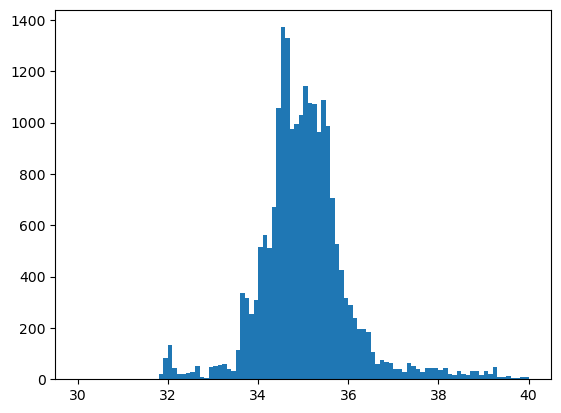

In [12]:
plt.hist(df_pe_inf[df_pe_inf['event_id']==ev_sim_id]['time']-df_header_short.iloc[ev_ID]['ev_time']+time_offset,
         bins=100,range=(30,40));

In [13]:
df_header_single_ev=df_header_short.iloc[ev_ID]
df_pe_inf_single_ev=df_pe_inf[df_pe_inf['event_id']==ev_sim_id]

In [14]:
df_header_single_ev

event_id     4102.000000
energy          2.319168
xcore         -26.319592
ycore           8.353882
ev_time      -103.984787
nphotons    56563.000000
n_pe        22071.000000
n_pixels     1470.000000
Name: 9, dtype: float64

<Axes: >

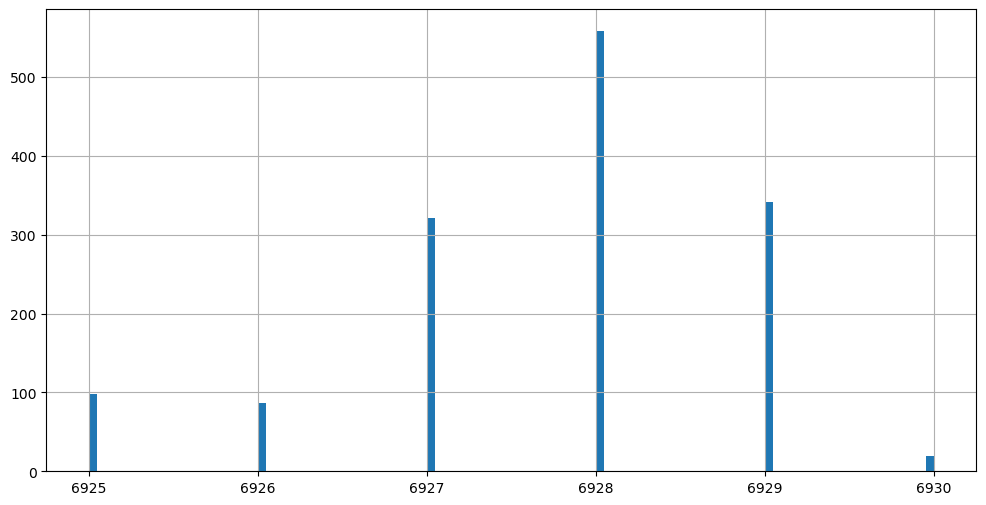

In [15]:
df_pe_inf_single_ev['pixel_id'].hist(bins=100,range=(6925,6930),figsize=(12,6))

In [16]:
ch_ID=6928

(30.0, 40.0)

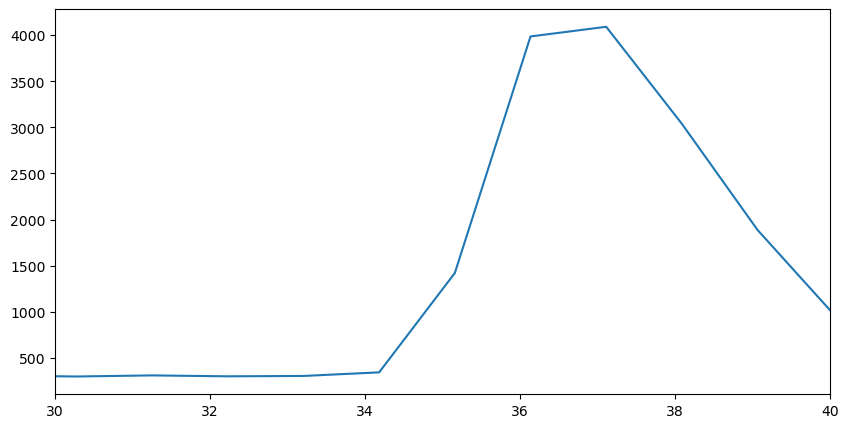

In [17]:
fig01, ax01 = plt.subplots(figsize=(10, 5))
ax01.plot(wf_times,wf_inf[ch_ID,:,ev_ID])
plt.xlim([30, 40])

In [18]:
df_tmp=df_pe_inf[df_pe_inf['event_id']==ev_sim_id]

(30.0, 40.0)

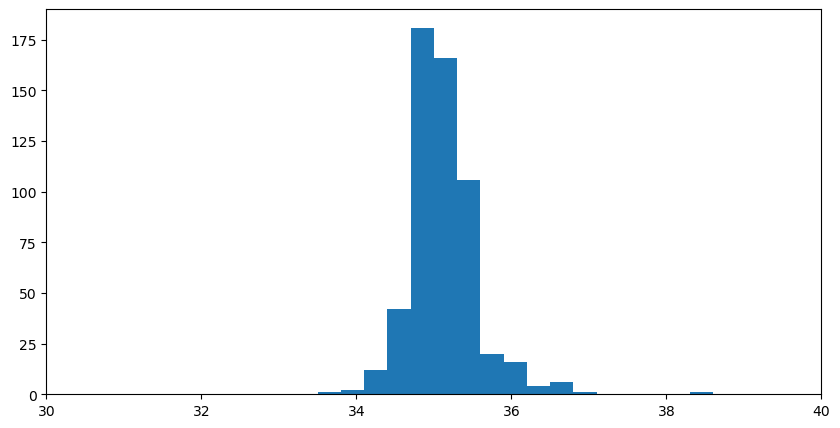

In [19]:
fig02, ax02 = plt.subplots(figsize=(10, 5))
ax02.hist(df_tmp[df_tmp['pixel_id']==6928]['time'] - df_header_short.iloc[ev_ID]['ev_time']+time_offset,
         bins=100,range=(20,50));
plt.xlim([30, 40])

<Axes: >

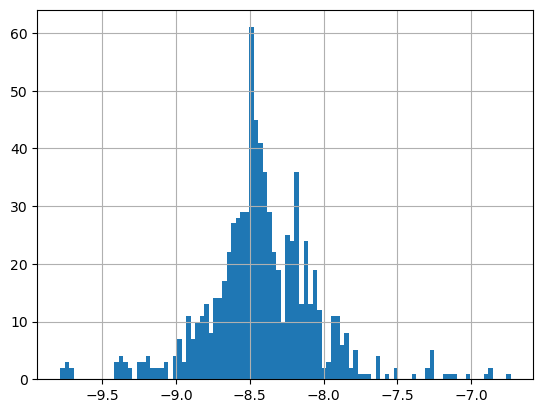

In [20]:
(df_pe_inf_single_ev[df_pe_inf_single_ev['pixel_id']==6680]['time']-df_header_short.iloc[212]['ev_time']).hist(bins=100)

In [21]:
len(df_pe_inf_single_ev[df_pe_inf_single_ev['pixel_id']==6680])

795

In [22]:
np.max(wf_inf[6680,:,212])

355

In [23]:
np.mean(wf_inf[6680,0:20,212])

300.15

In [24]:
(5893.0-297.55)/780.0

7.1736538461538455

In [14]:
A=np.concatenate((np.zeros((7987, 75))+1,np.zeros((7987, 75))+2,np.zeros((7987, 75))+3))

In [15]:
A.shape

(23961, 75)

In [16]:
23961.0/7987.0

3.0

In [27]:
rr=(np.zeros((7987, 75)),)
for i in range(1,10):
    rr  = rr + (np.zeros((7987, 75))+i,)

1
2
3
4
5
6
7
8
9


In [40]:
np.concatenate(rr).shape

(79870, 75)

In [35]:
len(rr)

10

In [38]:
rr.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [54]:
if False!=False :
    print(1)
else:
    print(2)

2


In [71]:
2000%1000

0

In [73]:
for i in range(0,100):
    if (i%10==0):
        print(i," ",i%10)

0   0
10   0
20   0
30   0
40   0
50   0
60   0
70   0
80   0
90   0
